In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as pdr


# For time stamps
from datetime import datetime
import yfinance as yf

import jugaad_data as jd


In [2]:
from datetime import date
from nsepy import get_history

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    stock_data = yf.download(stock, start=start, end=end)
    globals()[stock] = stock_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-10,178.100006,179.720001,177.949997,178.389999,177.481812,43698000
2023-10-11,178.199997,179.850006,177.600006,179.800003,178.884613,47551100
2023-10-12,180.070007,182.339996,179.039993,180.710007,179.789993,56743100
2023-10-13,181.419998,181.929993,178.139999,178.850006,177.939468,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,177.810120,52517000


In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,195.460992,197.241151,193.781786,195.619921,195.193927,5.912751e+07
std,20.383210,20.620515,19.936459,20.345304,20.538000,2.987962e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,179.782501,182.237495,178.762501,180.482506,179.644802,4.383430e+07
50%,190.400002,191.680000,189.204994,190.139999,189.765350,5.260695e+07
75%,216.247494,219.347504,214.529999,216.964996,216.902134,6.502268e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.186799e+08


<Axes: xlabel='Date'>

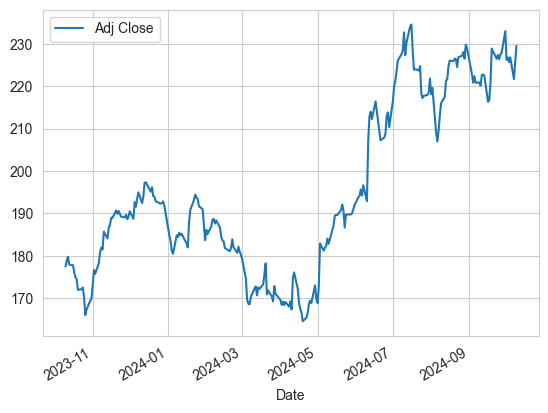

In [6]:
AAPL['Adj Close'].plot(legend=True)

<Axes: xlabel='Date'>

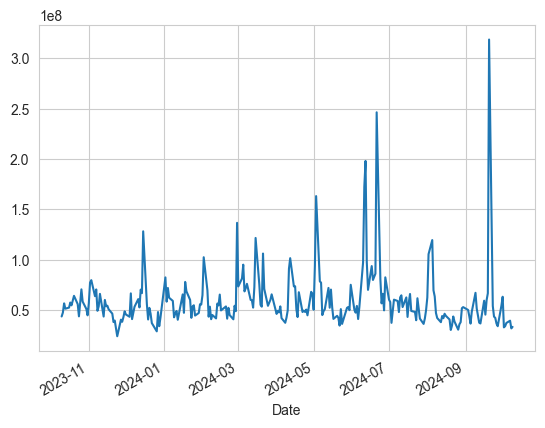

In [7]:
AAPL['Volume'].plot()

In [8]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()


<Axes: xlabel='Date'>

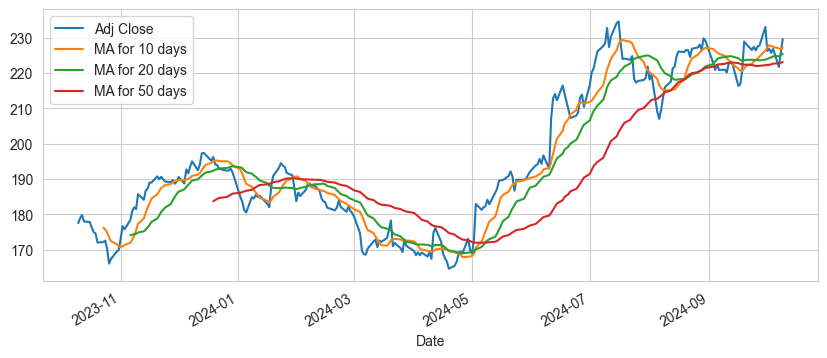

In [9]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

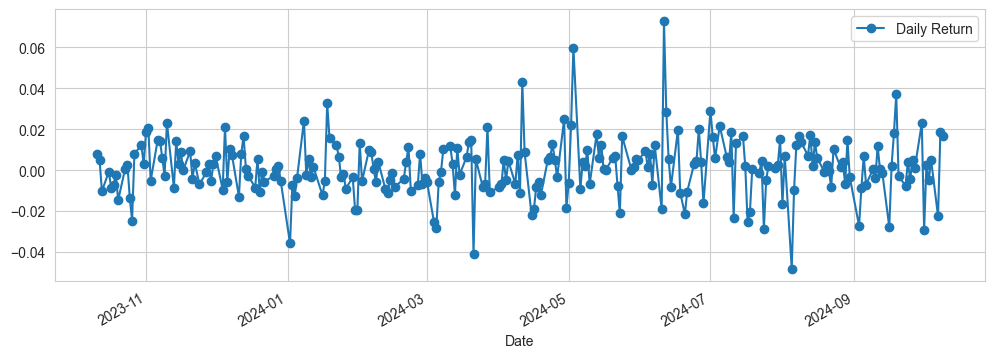

In [10]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='-',marker='o')

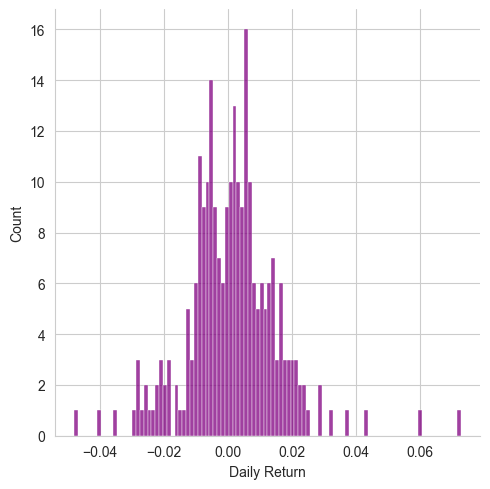

In [11]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [12]:
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [13]:
closing_df.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-10 00:00:00+00:00,177.481812,129.479996,138.858994,325.943451
2023-10-11 00:00:00+00:00,178.884613,131.830002,141.352859,329.943451
2023-10-12 00:00:00+00:00,179.789993,132.330002,139.946304,328.692780
2023-10-13 00:00:00+00:00,177.939468,129.789993,138.240509,325.288391
2023-10-16 00:00:00+00:00,177.810120,132.550003,140.145844,330.161774


In [14]:
tech_rets = closing_df.pct_change()

In [15]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-10 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-10-11 00:00:00+00:00,0.007904,0.018150,0.017960,0.012272
2023-10-12 00:00:00+00:00,0.005061,0.003793,-0.009951,-0.003791
2023-10-13 00:00:00+00:00,-0.010293,-0.019195,-0.012189,-0.010357
2023-10-16 00:00:00+00:00,-0.000727,0.021265,0.013783,0.014982


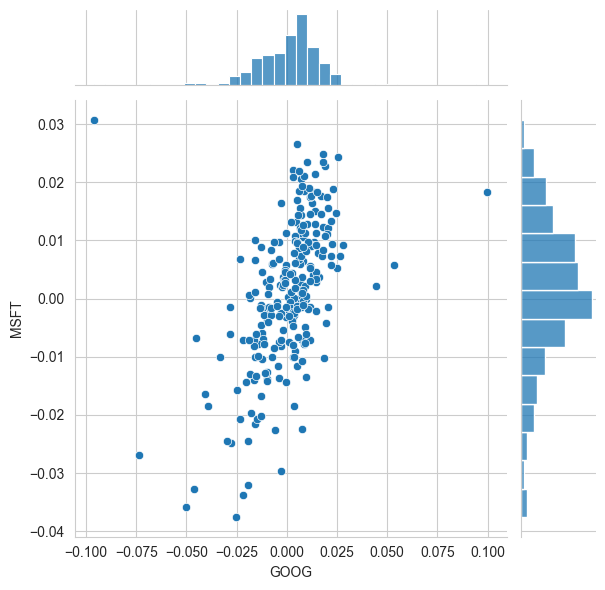

In [16]:
sns.jointplot(x= 'GOOG',y= 'MSFT',data= tech_rets,kind='scatter')

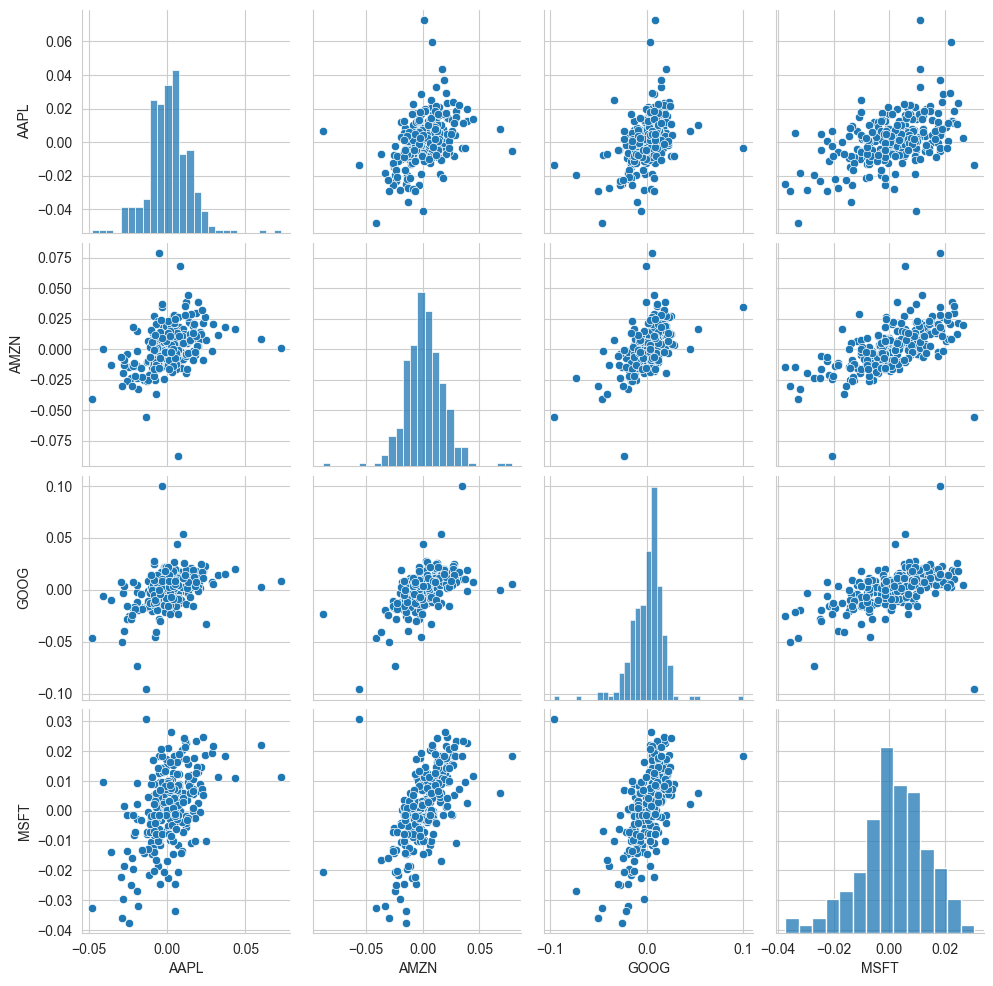

In [17]:
sns.pairplot(tech_rets.dropna())

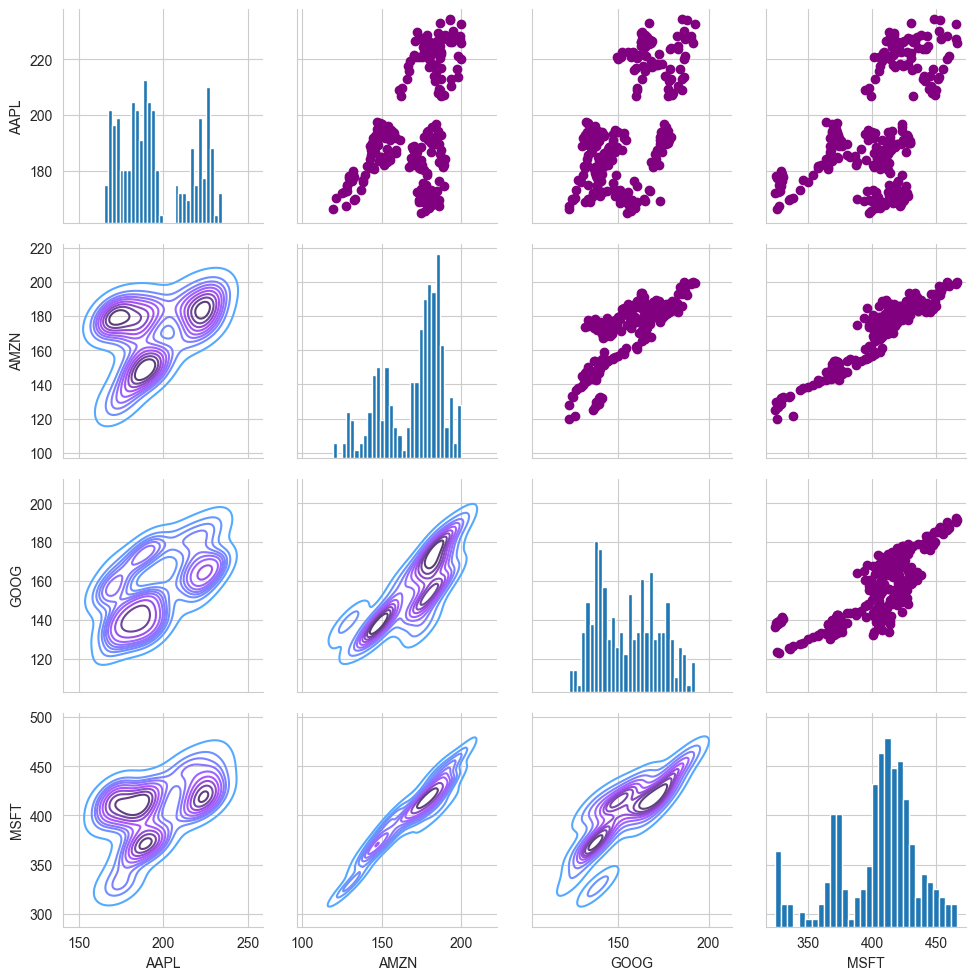

In [18]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<Axes: xlabel='Ticker', ylabel='Ticker'>

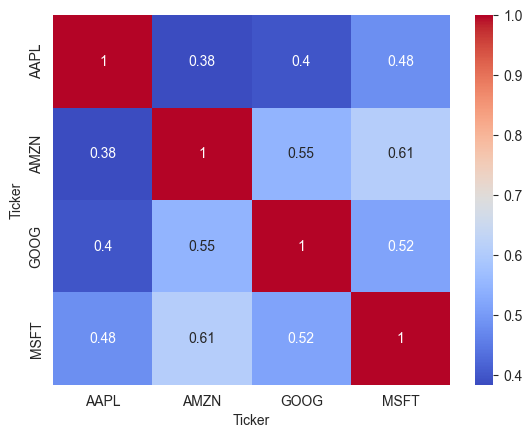

In [19]:
corr_matrix = tech_rets.dropna().corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

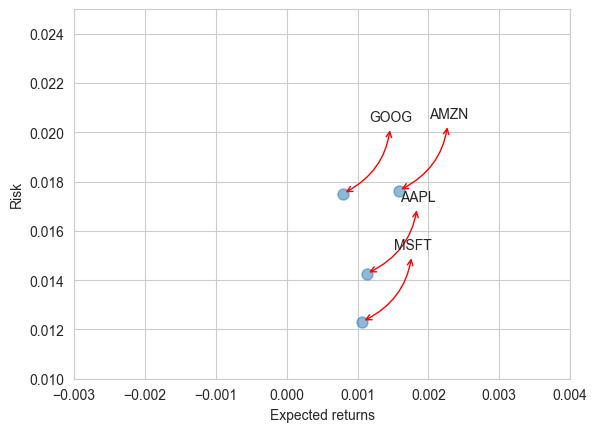

In [23]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<->', connectionstyle = 'arc3,rad=-0.3', color = 'red'))

In [24]:
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [30]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [31]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-10,139.509995,140.740005,138.429993,139.199997,138.858994,19554900
2023-10-11,139.850006,142.220001,139.839996,141.699997,141.352859,20146300
2023-10-12,142.160004,142.380005,139.449997,140.289993,139.946304,18173100
2023-10-13,140.649994,141.339996,137.970001,138.580002,138.240509,19438700
2023-10-16,139.729996,140.904999,139.320007,140.490005,140.145844,17345600


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

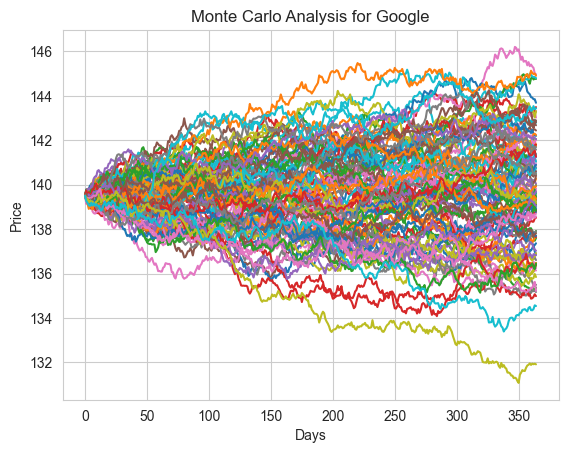

In [32]:
start_price = 139.50

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [33]:
#large data set

In [35]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

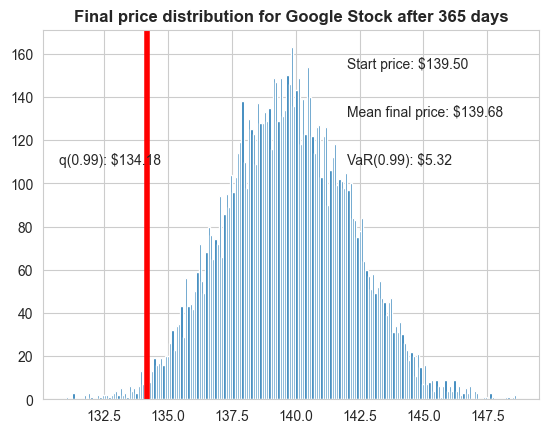

In [36]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');